In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

#Gráficos
import matplotlib.pyplot as plt

In [128]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv(('./test.csv'))

traindex = train_data.index
testdex = test_data.index

In [3]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


### 1. Preprocesamiento

Eliminamos el ID, el nombre y el ticket

In [129]:
train_data.drop(['PassengerId', 'Name','Ticket'], axis='columns',inplace=True)
test_data.drop(['PassengerId', 'Name','Ticket'], axis='columns',inplace=True)

### Indagamos qué información hay en las cabinas

Con la intención de revisar si las cabinas pueden tener alguna influencia en la sobrevivencia se reemplazan los Nan de la columna cabinas

In [130]:
cabinas =train_data.groupby('Cabin')['Pclass'].count()

In [131]:
cabinas = pd.pivot_table(train_data, values = 'Fare', index = ['Pclass'], columns =['Cabin'], aggfunc='count')

In [132]:
train_data['Cabin'].fillna('N', inplace=True)

In [133]:
train_data.loc[(train_data.Cabin != 'N')& (train_data.Pclass == 1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
11,1,1,female,58.0,0,0,26.5500,C103,S
23,1,1,male,28.0,0,0,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,D35,S
872,0,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,1,1,female,56.0,0,1,83.1583,C50,C
887,1,1,female,19.0,0,0,30.0000,B42,S


In [134]:
cabin_only = train_data[["Cabin"]].copy()

In [135]:
cabin_only["Deck"] = cabin_only["Cabin"].str.slice(0,1)

In [136]:
cabin_only["Room"] = cabin_only["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")

In [137]:
cabin_only

,Cabin,Deck,Room
0,N,N,NaN
1,C85,C,85.0
2,N,N,NaN
3,C123,C,123.0
4,N,N,NaN
...,...,...,...
886,N,N,NaN
887,B42,B,42.0
888,N,N,NaN
889,C148,C,148.0


In [138]:
cabin_only['Deck'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

In [139]:
train_data = train_data.join(cabin_only['Deck']).copy()

In [140]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,N,S,N
1,1,1,female,38.0,1,0,71.2833,C85,C,C
2,1,3,female,26.0,0,0,7.9250,N,S,N
3,1,1,female,35.0,1,0,53.1000,C123,S,C
4,0,3,male,35.0,0,0,8.0500,N,S,N


In [141]:
train_data.drop({'Cabin'}, axis = 'columns', inplace= True)

### Crear la característica en el set de test

In [142]:
cabinas =test_data.groupby('Cabin')['Pclass'].count()
cabinas = pd.pivot_table(test_data, values = 'Fare', index = ['Pclass'], columns =['Cabin'], aggfunc='count')
test_data['Cabin'].fillna('N', inplace=True)
cabin_only = test_data[["Cabin"]].copy()
cabin_only["Deck"] = cabin_only["Cabin"].str.slice(0,1)
cabin_only["Room"] = cabin_only["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")
test_data = test_data.join(cabin_only['Deck']).copy()
test_data.drop({'Cabin'}, axis = 'columns', inplace= True)

In [143]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,3,male,34.5,0,0,7.8292,Q,N
1,3,female,47.0,1,0,7.0000,S,N
2,2,male,62.0,0,0,9.6875,Q,N
3,3,male,27.0,0,0,8.6625,S,N
4,3,female,22.0,1,1,12.2875,S,N


Se observa que la tercera clase está más asociada a las cabinas perdidas,  
La primera clase tiene un 20% de cabinas perdidas, la segunda 91% y la tercera 97%

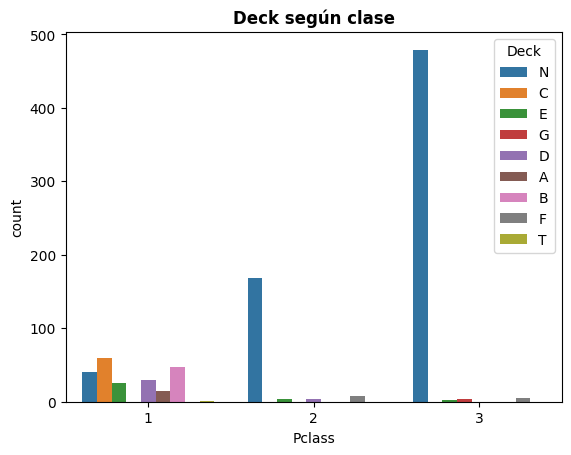

Deck,A,B,C,D,E,F,G,N,T
Pclass,,,,,,,,,
1,6.944444,21.759259,27.314815,13.425926,11.574074,0.000000,0.000000,18.518519,0.462963
2,0.000000,0.000000,0.000000,2.173913,2.173913,4.347826,0.000000,91.304348,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.610998,1.018330,0.814664,97.556008,0.000000


In [22]:
sns.countplot(x='Pclass', hue='Deck', data=train_data)
plt.title('Deck según clase', weight='bold')
plt.show()

table = pd.crosstab(train_data['Pclass'], train_data['Deck'], normalize='index')
table*100

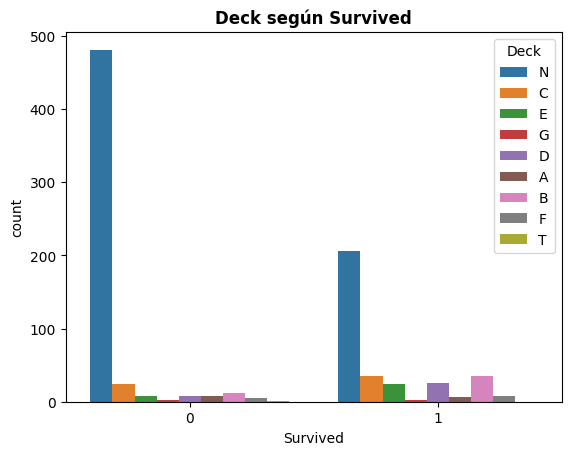

Deck,A,B,C,D,E,F,G,N,T
Survived,,,,,,,,,
0,8,12,24,8,8,5,2,481,1
1,7,35,35,25,24,8,2,206,0


In [23]:
sns.countplot(x='Survived', hue='Deck', data=train_data)
plt.title('Deck según Survived', weight='bold')
plt.show()

table = pd.crosstab(train_data['Survived'], train_data['Deck'])
table


### Indagamos sobre la variable Embarked

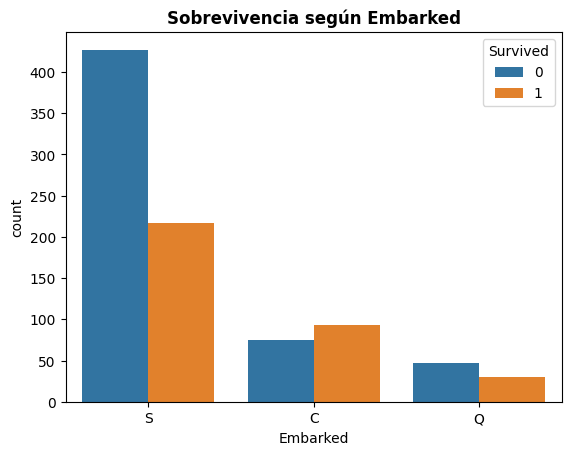

Survived,0,1
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


In [24]:
sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.title('Sobrevivencia según Embarked', weight='bold')
plt.show()

table = pd.crosstab(train_data['Embarked'], train_data['Survived'], normalize='index')
table*100

### Indagamos sobre la edad

In [25]:
age_null = train_data[train_data.Age.isnull()]

Los de tercera clase son los que tienen la mayor cantidad de registros de edad perdido +  
el máximo de relaciones de padres/hijos 8 (parch) y máximo de esposo(a)/hermano 9

In [26]:
age_null.groupby('Pclass')[('SibSp','Parch')].describe()

C:\Users\cj_li\AppData\Local\Temp\ipykernel_15284\1580944037.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_null.groupby('Pclass')[('SibSp','Parch')].describe()


SibSp                                                Parch            \
        count      mean       std  min  25%  50%   75%  max  count      mean   
Pclass                                                                         
1        30.0  0.200000  0.406838  0.0  0.0  0.0  0.00  1.0   30.0  0.033333   
2        11.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0   11.0  0.000000   
3       136.0  0.691176  1.827829  0.0  0.0  0.0  0.25  8.0  136.0  0.227941   

                                           
             std  min  25%  50%  75%  max  
Pclass                                     
1       0.182574  0.0  0.0  0.0  0.0  1.0  
2       0.000000  0.0  0.0  0.0  0.0  0.0  
3       0.595874  0.0  0.0  0.0  0.0  2.0

Veamos como se comporta la edad y la sobrevivencia.  
Para esto será necesario categorizar la edad.  
Se tiene 263 datos de edad perdidos, se tratarán por medio de imputación según el vecino más cercano

In [144]:
#Creamos 8 intervalos
rango = train_data['Age'].max() - train_data['Age'].min()
largo_intervalo = int(np.round(rango / 8))

In [145]:
#Calculamos los límites inferiores y superirores de los intervalos

limite_inferior = int(np.floor( train_data['Age'].min()))
limite_superior = int(np.floor( train_data['Age'].max()))

#Creamos la lista de intervalos
total_intervalos = [i for i in range(limite_inferior, limite_superior+largo_intervalo, largo_intervalo)]

In [146]:
total_intervalos

[0, 10, 20, 30, 40, 50, 60, 70, 80]

In [147]:
#Etiquetas de los intervalos
etiquetas_intervalos = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']

In [148]:
train_data['Age_intervalo'] = pd.cut(x=train_data['Age'], bins=total_intervalos, labels=etiquetas_intervalos, include_lowest=True)

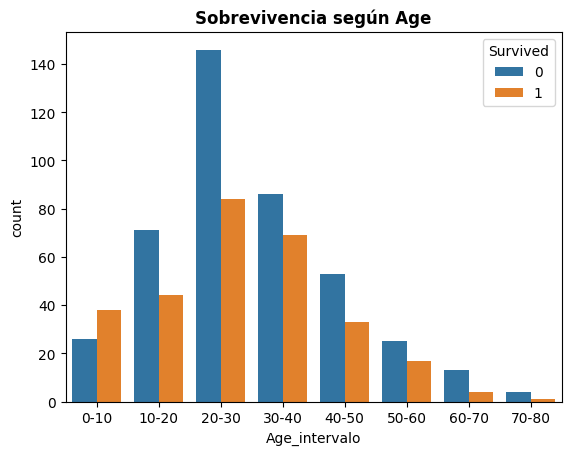

Survived,0,1
Age_intervalo,,
0-10,40.625000,59.375000
10-20,61.739130,38.260870
20-30,63.478261,36.521739
30-40,55.483871,44.516129
40-50,61.627907,38.372093
50-60,59.523810,40.476190
60-70,76.470588,23.529412
70-80,80.000000,20.000000


In [38]:
sns.countplot(x='Age_intervalo', hue='Survived', data=train_data)
plt.title('Sobrevivencia según Age', weight='bold')
plt.show()

table = pd.crosstab(train_data['Age_intervalo'], train_data['Survived'], normalize='index')
table*100

Ahora veremos como se relaciona la edad con la Clase

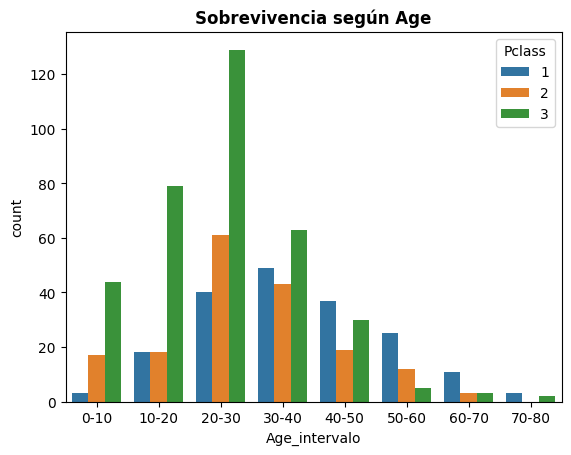

Pclass,1,2,3
Age_intervalo,,,
0-10,4.687500,26.562500,68.750000
10-20,15.652174,15.652174,68.695652
20-30,17.391304,26.521739,56.086957
30-40,31.612903,27.741935,40.645161
40-50,43.023256,22.093023,34.883721
50-60,59.523810,28.571429,11.904762
60-70,64.705882,17.647059,17.647059
70-80,60.000000,0.000000,40.000000


In [39]:
sns.countplot(x='Age_intervalo', hue='Pclass', data=train_data)
plt.title('Sobrevivencia según Age', weight='bold')
plt.show()

table = pd.crosstab(train_data['Age_intervalo'], train_data['Pclass'], normalize='index')
table*100

### Revisamos la variable Deck

<AxesSubplot: xlabel='Deck', ylabel='Age'>

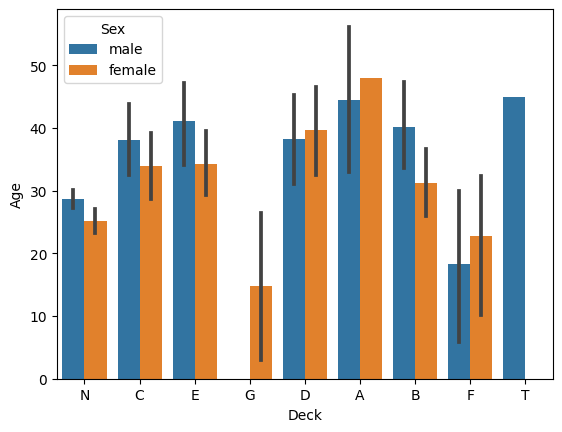

In [40]:
sns.barplot(x='Deck', y='Age', hue ='Sex', data=train_data)

In [149]:
titanic_2 = train_data.copy()

In [150]:
titanic_3 = test_data.copy()

In [42]:
titanic_sin_N = train_data.query("Deck != 'N'")

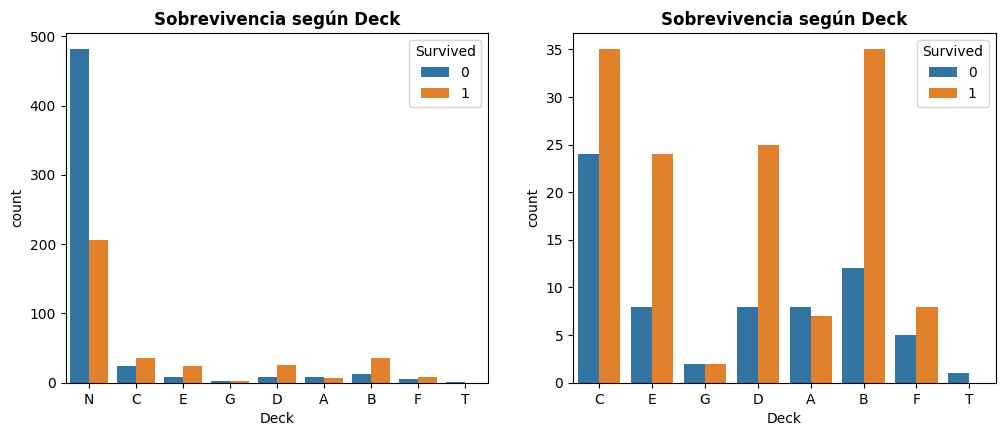

Survived,0,1
Deck,,
A,53.333333,46.666667
B,25.531915,74.468085
C,40.677966,59.322034
D,24.242424,75.757576
E,25.000000,75.000000
F,38.461538,61.538462
G,50.000000,50.000000
N,70.014556,29.985444
T,100.000000,0.000000


In [43]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.countplot(x='Deck', hue='Survived', data=train_data)
plt.title('Sobrevivencia según Deck', weight='bold')

plt.subplot(2,2,2)
sns.countplot(x='Deck', hue='Survived', data=titanic_sin_N)
plt.title('Sobrevivencia según Deck', weight='bold')

plt.show()

table = pd.crosstab(train_data['Deck'], train_data['Survived'], normalize='index')
table*100

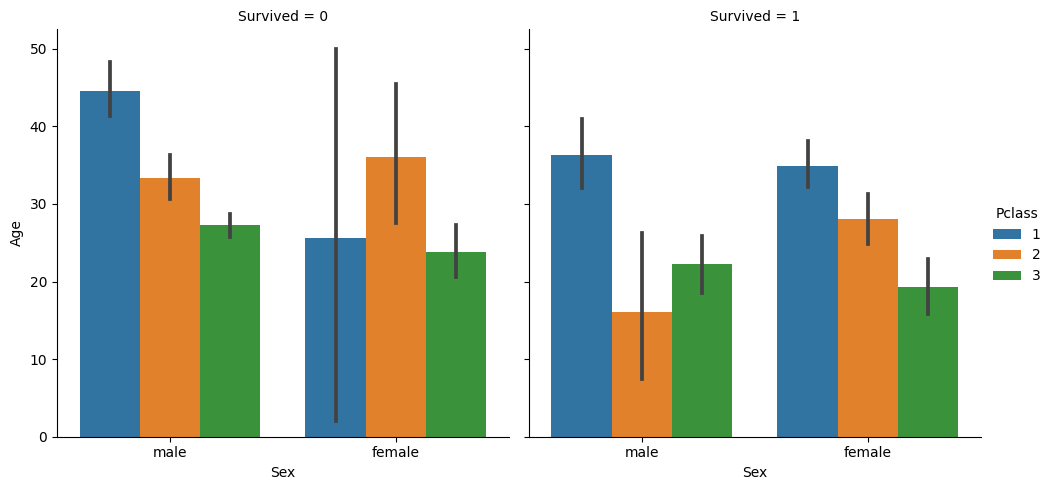

In [44]:
sns.catplot(x="Sex", y="Age", hue="Pclass", col="Survived", data=train_data, kind="bar")

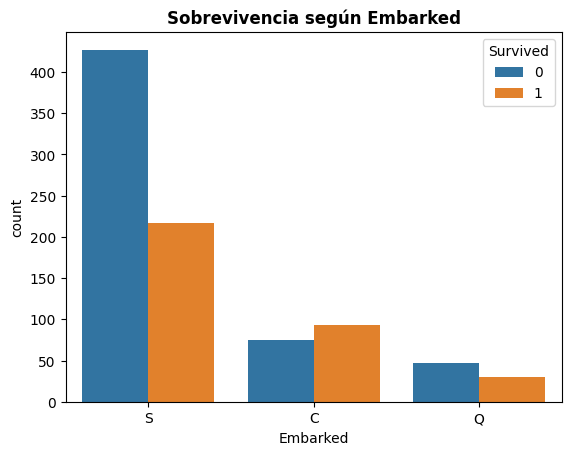

Survived,0,1
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


In [45]:
sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.title('Sobrevivencia según Embarked', weight='bold')
plt.show()

table = pd.crosstab(train_data['Embarked'], train_data['Survived'], normalize='index')
table*100

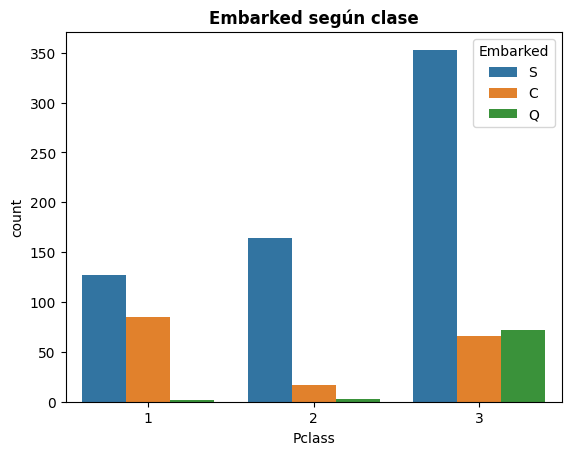

Embarked,C,Q,S
Pclass,,,
1,39.719626,0.934579,59.345794
2,9.239130,1.630435,89.130435
3,13.441955,14.663951,71.894094


In [46]:
sns.countplot(x='Pclass', hue='Embarked', data=train_data)
plt.title('Embarked según clase', weight='bold')
plt.show()

table = pd.crosstab(train_data['Pclass'], train_data['Embarked'], normalize='index')
table*100

Vemos como se comporta la supervivencia de las personas según tenian familia o venian solos

In [151]:
train_data.groupby(['Survived', 'SibSp', 'Parch'])['Survived'].count().unstack().fillna('-')

Parch               0     1     2    3    4    5    6
Survived SibSp                                       
0        0      374.0  13.0   8.0    -  1.0  2.0    -
         1       59.0  23.0   7.0  2.0  3.0  2.0  1.0
         2       12.0   1.0   2.0    -    -    -    -
         3          -   7.0   5.0    -    -    -    -
         4          -   9.0   6.0    -    -    -    -
         5          -     -   5.0    -    -    -    -
         8          -     -   7.0    -    -    -    -
1        0      163.0  25.0  21.0  1.0    -    -    -
         1       64.0  34.0  12.0  1.0    -  1.0    -
         2        4.0   6.0   2.0  1.0    -    -    -
         3        2.0     -   2.0    -    -    -    -
         4          -     -   3.0    -    -    -    -

Se crea la columna que indica si la persona tiene familia (1) o iba sola (0)

In [152]:
train_data['Family'] = np.where(((train_data['Parch'] > 0) & (train_data['SibSp'] > 0)), 1, 0)
test_data['Family'] = np.where(((test_data['Parch'] > 0) & (test_data['SibSp'] > 0)), 1, 0) #Para test

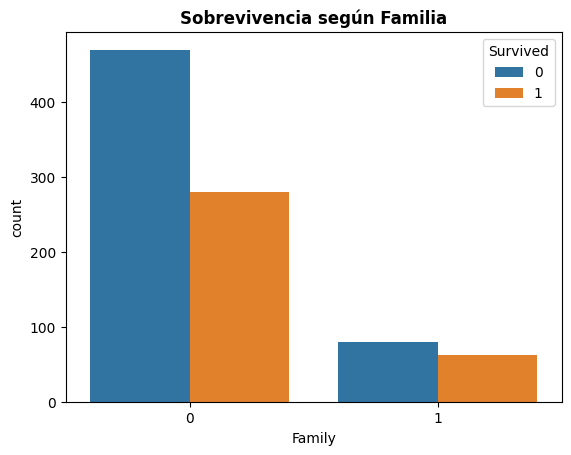

Survived,0,1
Family,,
0,0.626168,0.373832
1,0.563380,0.436620


In [49]:
sns.countplot(x='Family', hue='Survived', data=train_data)
plt.title('Sobrevivencia según Familia', weight='bold')
plt.show()

table = pd.crosstab(train_data['Family'], train_data['Survived'], normalize='index')
table

### Resumen del EDA mediante gráfica

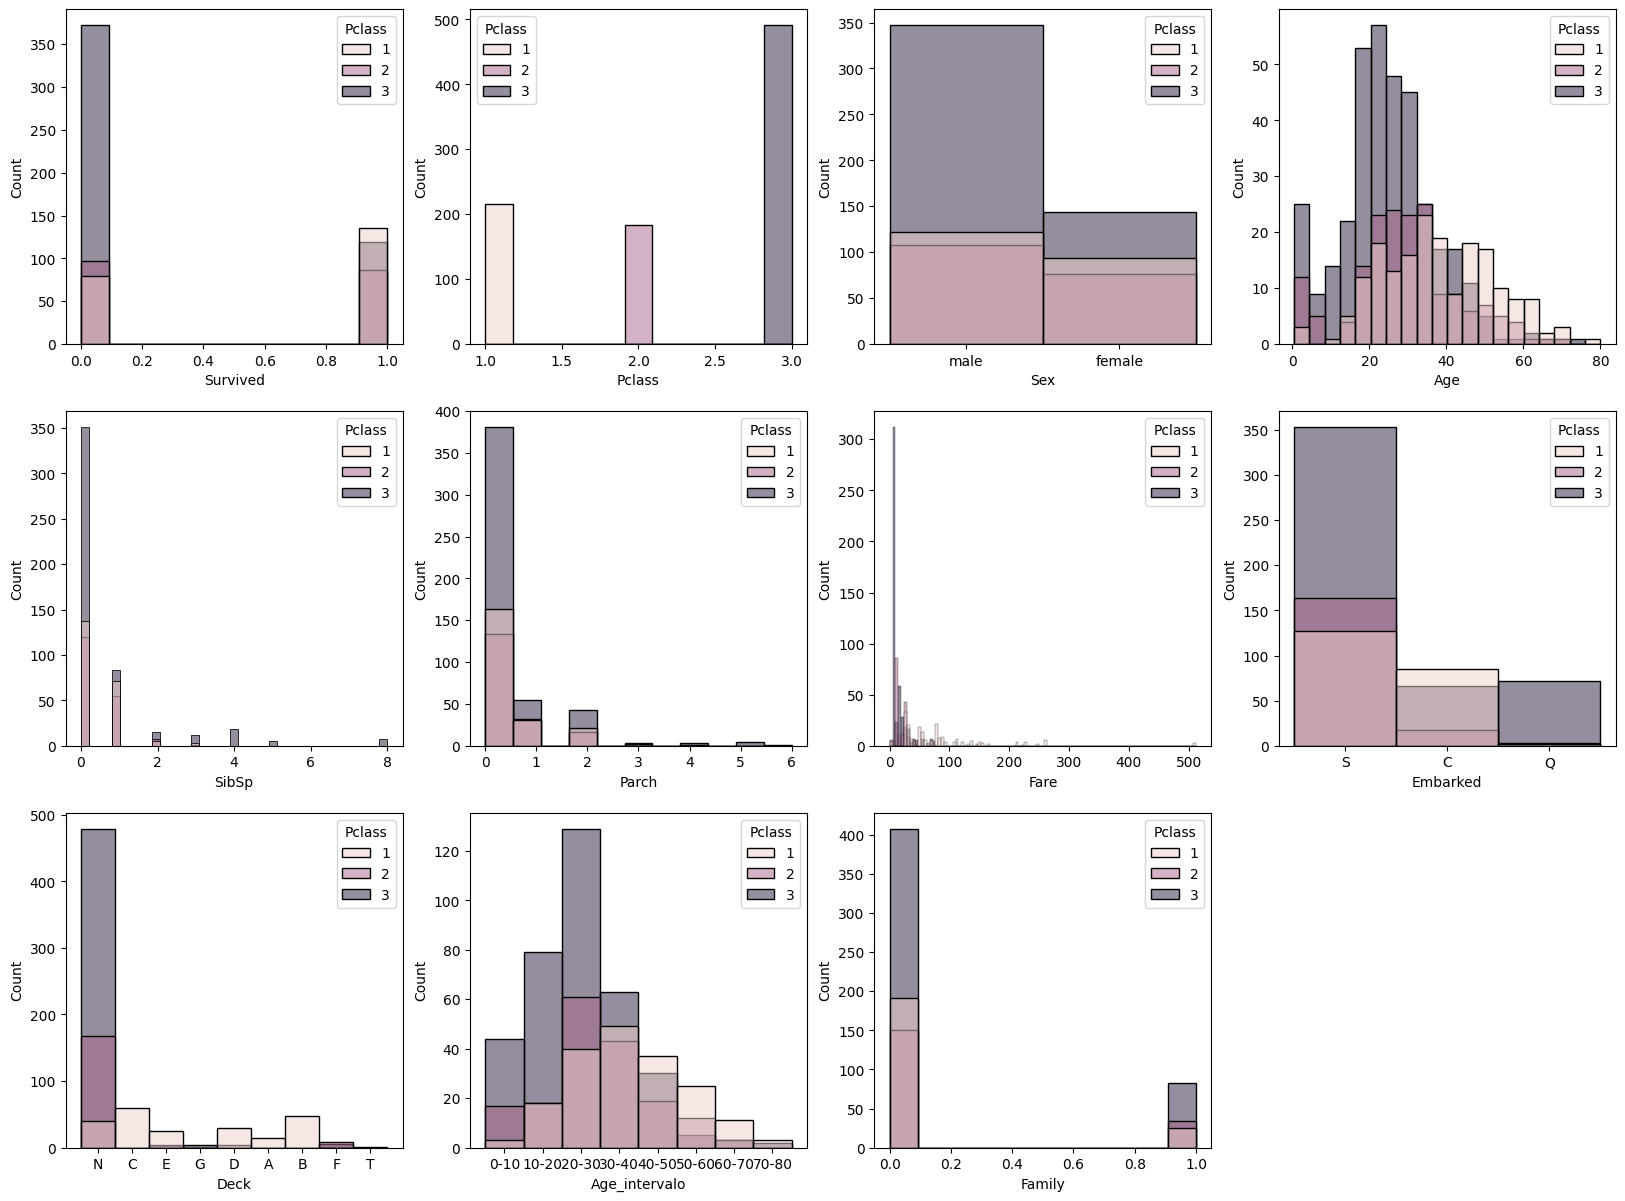

In [50]:
plt.figure(figsize=(20,20))
for i, v in enumerate(train_data):
    plt.subplot(4,4,i+1)
    sns.histplot(x = v , data = train_data, hue='Pclass')
    
plt.show()

### Tratamiento de MV

In [153]:
print(train_data.isnull().sum())
print('\n')
print(test_data.isnull().sum())

Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Embarked           2
Deck               0
Age_intervalo    177
Family             0
dtype: int64


Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Deck         0
Family       0
dtype: int64


Para imputar las variables faltantes, aplicaré una imputación según el vecino más cercano.  
El algoritmo trabaja con distancias, por lo tanto, es aplicar un encoder y estandarizar las variables.  
Primero imputamos las otras variables faltantes

In [154]:
#Fare según el promedio de la clase
test_data.groupby('Pclass')['Fare'].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [58]:
class_fare = {1: 94.280297, 2:22.202104, 3:12.459678}

In [59]:
def fill_fare(columns):
    fare = columns[0]
    pclass = np.int64(columns[1])
    return class_fare[pclass] if pd.isnull(fare) else fare

In [155]:
test_data['Fare'] = test_data[['Fare', 'Pclass']].apply(fill_fare, axis=1)

In [156]:
train_data.groupby('Pclass')['Embarked'].describe()

,count,unique,top,freq
Pclass,,,,
1,214,3,S,127
2,184,3,S,164
3,491,3,S,353


In [157]:
#Embarked según el dato que ma´s se repite
train_data['Embarked']= train_data['Embarked'].fillna('S')

Antes de hacer el encoder, debemos aislar la variable objetivo

In [158]:
y = pd.DataFrame(train_data['Survived'])
train_data.drop(['Survived', 'Age_intervalo','SibSp','Parch'], axis='columns',inplace=True)

In [169]:
test_data.drop(['SibSp','Parch'], axis='columns',inplace=True)

### Aplicación de Encoder_1 con LabelEncoder

In [77]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

categorización de variables binarias en train y test

In [166]:
train_data['Sex'] = train_data['Sex'].replace({'male': 1, 'female': 0}).astype('category')
test_data['Sex'] = test_data['Sex'].replace({'male': 1, 'female': 0}).astype('category')

train_data['Pclass'] = train_data['Pclass'].astype('category')
test_data['Pclass'] = test_data['Pclass'].astype('category')

train_data['Family'] = train_data['Family'].astype('category')
test_data['Family'] = test_data['Family'].astype('category')

Categorización de variables multiclase

In [159]:
# Lista de condiciones
condiciones = [
    (train_data["Deck"] == "A"),
    (train_data["Deck"] == "B"),
    (train_data["Deck"] == "C"),
    (train_data["Deck"] == "D"),
    (train_data["Deck"] == "E"),
    (train_data["Deck"] == "F"),
    (train_data["Deck"] == "G"),
    (train_data["Deck"] == "N"),
    (train_data["Deck"] == "T")
                ]

# Lista de valores a asginar para cada condicion
valores = [1,2,3,4,5,6,7,8,9
          ]

# Se crea nueva columna y se usa np.select para asignar valores 
train_data["Deck"] = np.select(condiciones, valores)
train_data['Deck'] = train_data['Deck'].astype('category')


In [161]:
# Lista de condiciones
condiciones = [
    (test_data["Deck"] == "A"),
    (test_data["Deck"] == "B"),
    (test_data["Deck"] == "C"),
    (test_data["Deck"] == "D"),
    (test_data["Deck"] == "E"),
    (test_data["Deck"] == "F"),
    (test_data["Deck"] == "G"),
    (test_data["Deck"] == "N"),
    (test_data["Deck"] == "T")
                ]

# Lista de valores a asginar para cada condicion
valores = [1,2,3,4,5,6,7,8,9
          ]

# Se crea nueva columna y se usa np.select para asignar valores 
test_data["Deck"] = np.select(condiciones, valores)
test_data['Deck'] = test_data['Deck'].astype('category')

In [162]:
# Lista de condiciones
condiciones = [
    (train_data["Embarked"] == "S"),
    (train_data["Embarked"] == "C"),
    (train_data["Embarked"] == "Q")
    ]

# Lista de valores a asginar para cada condicion
valores = [1,2,3
          ]

# Se crea nueva columna y se usa np.select para asignar valores 
train_data["Embarked"] = np.select(condiciones, valores)
train_data['Embarked'] = train_data['Embarked'].astype('category')

In [163]:
# Lista de condiciones
condiciones = [
    (test_data["Embarked"] == "S"),
    (test_data["Embarked"] == "C"),
    (test_data["Embarked"] == "Q")
    ]

# Lista de valores a asginar para cada condicion
valores = [1,2,3
          ]

# Se crea nueva columna y se usa np.select para asignar valores 
test_data["Embarked"] = np.select(condiciones, valores)
test_data['Embarked'] = test_data['Embarked'].astype('category')

In [170]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Deck,Family
0,3,1,34.5,7.8292,3,8,0
1,3,0,47.0,7.0000,1,8,0
2,2,1,62.0,9.6875,3,8,0
3,3,1,27.0,8.6625,1,8,0
4,3,0,22.0,12.2875,1,8,1


#### Se aplica estandar escaler

In [174]:
from sklearn.preprocessing import StandardScaler

In [176]:
#no se debe ajustar la escala en los nuevos datos (test_data) 
#debo usar el escalador ajustado en los datos de entrenamiento y con esto transformar directamente a los datos nuevos

# Instanciar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
train_esc = pd.DataFrame(scaler.fit_transform(train_data), columns=train_data.columns)

# Solo transformar los datos de prueba (sin ajuste)
test_esc = pd.DataFrame(scaler.transform(test_data), columns=test_data.columns)

In [ ]:
"""
no se debe ajustar la escala en los nuevos datos (test_data) debo usar el escalador ajustado en los datos de entrenamiento y con esto transformar directamente a los datos nuevos

scaler_train = StandardScaler().fit(train_data)
scaler_test = StandardScaler().fit(test_data)


train_esc = pd.DataFrame(scaler_train.transform(train_data))
train_esc.columns = train_data.columns.tolist()

test_esc = pd.DataFrame(scaler_test.transform(test_data))
test_esc.columns = test_data.columns.tolist()
"""

In [178]:
test_esc.isnull().sum()

Pclass       0
Sex          0
Age         86
Fare         0
Embarked     0
Deck         0
Family       0
dtype: int64

### En este punto, probaré imputar los MV de edad por medio de KNNImputer

In [181]:
from sklearn.impute import KNNImputer

In [182]:
# Crear un imputador KNN
imputer = KNNImputer(n_neighbors=3, weights='distance', metric='nan_euclidean')

# Imputar los valores perdidos en los datos de entrenamiento
train_im = imputer.fit_transform(train_esc)

# Imputar los valores perdidos en los datos de prueba utilizando el imputador ajustado
test_im = imputer.transform(test_esc)

In [185]:
train_im = pd.DataFrame(train_im, columns=train_esc.columns)
test_im = pd.DataFrame(test_im, columns=test_esc.columns)

## Modelamiento

### Separación de muestras

Separaré las muestras:  

En primer lugar almacenaré los datos con edad faltante y los trataré como datos target.  
Posteriormente, eliminaré los registros faltantes del dataframe prinpcipal y lo trataré como subdata, con la cual haré testeo y entrenamiento

In [192]:
train_im.to_csv('train_im.csv',index=False)
test_im.to_csv('test_im.csv',index=False)

### Se realizará una reducción de variables mediante componentes principales

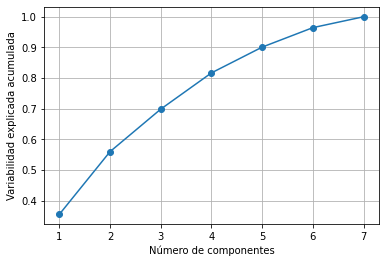

In [64]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as  plt
pca_model = PCA()
pca_model.fit(titanic_train_X)
plt.plot(range(1,8),pca_model.explained_variance_ratio_.cumsum(), marker = 'o')
plt.xlabel('Número de componentes')
plt.ylabel('Variabilidad explicada acumulada')
plt.grid()

Se hará el corte considerando explicar el 80% de los datos

In [65]:
pca_model = PCA(n_components = 4)
pca_model.fit(titanic_train_X)
pca_titanic_train_X = pd.DataFrame(pca_model.transform(titanic_train_X))
pca_titanic_train_X.head()

,0,1,2,3
0,-1.345684,-0.486433,0.185015,0.192068
1,3.099507,0.339156,-1.521890,-0.236233
2,-0.960993,0.417005,-0.490545,-1.452336
3,2.351414,0.135858,0.320296,-1.497491
4,-1.090445,-0.948594,0.309304,0.032971


## Probar modelos

### División de datos

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(train_im, y, test_size=0.2, random_state=2023)

In [ ]:
#Probar modelos con los PCA
train_X, test_X, train_y, test_y = train_test_split(pca_titanic_train_X, titanic_train_y, test_size=0.2, random_state=2023)

### Primer arpoach con RF

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [200]:
##para corregir el problema del vector objetivo
y_train = np.ravel(y_train)

In [198]:
#entrenamos el random forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

pred_values_rf = rf_model.predict(X_test)
print(classification_report(y_test,pred_values_rf))
print(confusion_matrix(y_test,pred_values_rf))

C:\Users\cj_li\AppData\Local\Temp\ipykernel_15284\1114971145.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.85      0.90      0.88       113
           1       0.81      0.73      0.77        66

    accuracy                           0.84       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179

[[102  11]
 [ 18  48]]


### Hacemos un ajuste de parámetros

In [199]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100, 300, 400, 800],
    'max_depth' : [2,3,5,7,9,11,12],
    'max_features' : [2,3,4,5,6,7]
}

opt_rf_model = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, n_jobs = -2)
opt_rf_model.fit(X_train,y_train)
pred_values_rf = opt_rf_model.predict(X_test)

print(opt_rf_model.best_params_)
print(classification_report(y_test,pred_values_rf))
print(confusion_matrix(y_test,pred_values_rf))

c:\Users\cj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 7, 'max_features': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       113
           1       0.83      0.74      0.78        66

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179

[[103  10]
 [ 17  49]]


### Probaré otro ajuste de parámetros con hyperopt

In [201]:
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, tpe, hp, Trials

In [202]:
# Define objective function
def objective_function(parameters):
    # Initiate RandomForestRegressor
    regressor = RandomForestClassifier(**parameters)
    
    # Calculate the mean cross-validation score using 5 folds
    score = cross_val_score(regressor, X_train, y_train, cv=5).mean()
    
    return -score

# Define search Space
search_space = {
    'n_estimators': hp.choice('n_estimators', range(10, 1000)),
    'max_depth': hp.choice('max_depth', range(1, 30)),
}

In [203]:
# Trials object to store the results
trials = Trials()

# Run optimization
best = fmin(fn=objective_function, space=search_space, algo=tpe.suggest, trials=trials, max_evals=100)
print(best)

100%|██████████| 100/100 [05:56<00:00,  3.57s/trial, best loss: -0.8174037230375258]
{'max_depth': 9, 'n_estimators': 915}


In [204]:
rf_hopt = RandomForestClassifier(**best)
rf_hopt.fit(X_train,y_train)
pred_values_rf = rf_hopt.predict(X_test)

print(classification_report(y_test,pred_values_rf))
print(confusion_matrix(y_test,pred_values_rf))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       113
           1       0.84      0.71      0.77        66

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

[[104   9]
 [ 19  47]]


### Optimización mendiante Randomized Search

In [205]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [206]:

param_grid = {
    'n_estimators' : randint(100, 1000),
    'max_depth' : randint(2, 30),
    'max_features' : randint(2,7)
}
# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=100, cv=5,scoring='precision',n_jobs=-2,random_state=2023)
random_search.fit(X_train,y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

Mejores hiperparámetros encontrados:
{'max_depth': 6, 'max_features': 6, 'n_estimators': 105}


In [207]:
random_rf_model = RandomForestClassifier(**random_search.best_params_)
random_rf_model.fit(X_train,y_train)
pred_values_rf = random_rf_model.predict(X_test)

print(random_search.best_params_)
print(classification_report(y_test,pred_values_rf))
print(confusion_matrix(y_test,pred_values_rf))

{'max_depth': 6, 'max_features': 6, 'n_estimators': 105}
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       113
           1       0.86      0.76      0.81        66

    accuracy                           0.87       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.87      0.87      0.86       179

[[105   8]
 [ 16  50]]


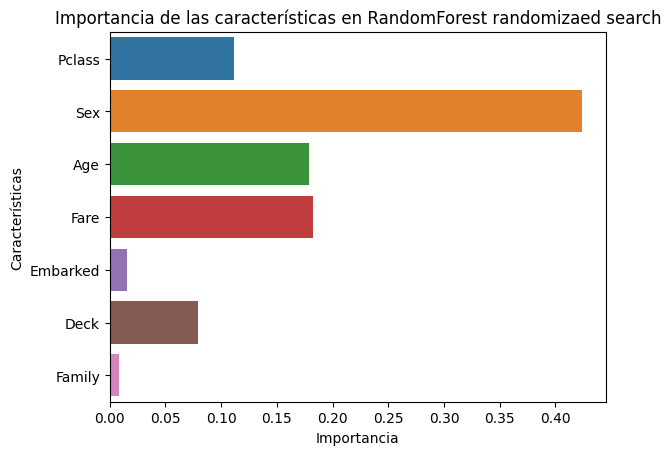

In [212]:
# Obtener la importancia de las caracteristicas en el modelo.

feature_importance = random_rf_model.feature_importances_

# Crear un gráfico de barras de la importancia de las características
sns.barplot(x=feature_importance, y=X_train.columns)
plt.title('Importancia de las características en RandomForest randomizaed search')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

### Extra Tree Classifier

In [213]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

In [214]:
ex_tree_model = ExtraTreesClassifier()
ex_tree_model.fit(X_train, y_train)
pred_values_ex_tree = ex_tree_model.predict(X_test)
print(classification_report(y_test,pred_values_ex_tree))
print(confusion_matrix(y_test,pred_values_ex_tree))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       113
           1       0.78      0.70      0.74        66

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179

[[100  13]
 [ 20  46]]


In [217]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100,200,300,400,500],
    'max_depth' : [2,3,5,7,9,11,12],
    'max_features' : [2,3,4,5,6,7]
}

opt_ex_tree_model = GridSearchCV(ExtraTreesClassifier(), param_grid = param_grid, n_jobs = -2)
opt_ex_tree_model.fit(X_train,y_train)
pred_values_ex_tree = opt_ex_tree_model.predict(X_test)

print(opt_ex_tree_model.best_params_)
print(classification_report(y_test,pred_values_ex_tree))
print(confusion_matrix(y_test,pred_values_ex_tree))

{'max_depth': 11, 'max_features': 2, 'n_estimators': 400}
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       113
           1       0.80      0.67      0.73        66

    accuracy                           0.82       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.82      0.81       179

[[102  11]
 [ 22  44]]


### Segundo arpoach con árboles decisión

In [218]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
pred_values_tree = tree_model.predict(X_test)
print(classification_report(y_test,pred_values_tree))
print(confusion_matrix(y_test,pred_values_tree))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       113
           1       0.76      0.73      0.74        66

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

[[98 15]
 [18 48]]


### Tercer aproach con ADA

In [252]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=15), n_estimators=300, algorithm='SAMME.R', learning_rate= 0.5)
ab_model.fit(X_train, y_train)

pred_values_ab = ab_model.predict(X_test)
print(classification_report(y_test,pred_values_ab))
print(confusion_matrix(y_test,pred_values_ab))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       113
           1       0.71      0.71      0.71        66

    accuracy                           0.79       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

[[94 19]
 [19 47]]


### 4. GBM

In [224]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

pred_values_gbm = gbm_model.predict(X_test)
print(classification_report(y_test,pred_values_gbm))
print(confusion_matrix(y_test,pred_values_gbm))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       113
           1       0.79      0.73      0.76        66

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

[[100  13]
 [ 18  48]]


In [221]:
# Otro método de optimizar hiper-parámetros
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [223]:
param_dist = {'learning_rate': sp_randFloat(),
                'n_estimators' : sp_randInt(100, 1000),
                'max_depth': sp_randInt(2,12)
             }

opt_gbm_model = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions = param_dist, cv = 5, scoring='precision', n_iter= 300,n_jobs=-2)
opt_gbm_model.fit(X_train,y_train)
pred_values_gbm = opt_gbm_model.predict(X_test)

print(opt_gbm_model.best_params_)
print(classification_report(y_test,pred_values_gbm))
print(confusion_matrix(y_test,pred_values_gbm))

{'learning_rate': 0.09094214998945604, 'max_depth': 3, 'n_estimators': 118}
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       113
           1       0.79      0.73      0.76        66

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

[[100  13]
 [ 18  48]]


### 5. XGBoost

In [225]:
from xgboost import XGBClassifier

In [226]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

pred_values_xgb = xgb_model.predict(X_test)
print(classification_report(y_test,pred_values_xgb))
print(confusion_matrix(y_test,pred_values_xgb))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       113
           1       0.77      0.73      0.75        66

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

[[99 14]
 [18 48]]


### 5.1 Ajuste con búsqueda aleatoria de parámetros

In [227]:
param_dist = {'learning_rate': sp_randFloat(),
                'n_estimators' : sp_randInt(10, 1000),
                'max_depth': sp_randInt(2,15)
             }

opt_xgb_model = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions = param_dist, cv = 10, scoring='precision',n_jobs=-2,random_state=2023, n_iter= 100)
opt_xgb_model.fit(X_train,y_train)
pred_values_xgb = opt_xgb_model.predict(X_test)

print(opt_xgb_model.best_params_)
print(classification_report(y_test,pred_values_xgb))
print(confusion_matrix(y_test,pred_values_xgb))

{'learning_rate': 0.028080463264563815, 'max_depth': 5, 'n_estimators': 353}
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       113
           1       0.79      0.73      0.76        66

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

[[100  13]
 [ 18  48]]


### 5.2 XGBoost con búsqueda exhaustiva de parámetros  
Tardó 735 minutos!

In [97]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : range(100, 1000),
    'max_depth' : range(2, 20),
    'max_features' : [2,3,4,5,6,7]
}

opt_xgb_grid = GridSearchCV(XGBClassifier(), param_grid = param_grid, cv = 5, n_jobs = -1, scoring='precision')
opt_xgb_grid.fit(train_X,train_y)
pred_values_rf = opt_xgb_grid.predict(test_X)

print(opt_xgb_grid.best_params_)
print(classification_report(test_y,pred_values_rf))
print(confusion_matrix(test_y,pred_values_rf))

[21:56:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_features" } are not used.

{'max_depth': 2, 'max_features': 2, 'n_estimators': 140}
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       113
         1.0       0.79      0.74      0.77        66

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

[[100  13]
 [ 17  49]]


### 5.3 XGBoost con optimización con hyperopt

In [233]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe,space_eval
from sklearn.model_selection import StratifiedKFold

https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning

### Otra Forma

In [238]:
space={'max_depth': hp.choice('max_depth', range(2,15)),
        'gamma': hp.choice('gamma', [i/10.0 for i in range(0,5)]),
        'colsample_bytree' : hp.choice('colsample_bytree', [i/10.0 for i in range(3,10)]),
        'reg_alpha' : hp.choice('reg_alpha', [1e-5, 1e-2, 0.1, 1, 10, 100]),
        'reg_lambda' : hp.choice('reg_lambda', [1e-5, 1e-2, 0.1, 1, 10, 100]),
        'learning_rate':hp.uniform('learning_rate', 0.001, 1),
        'n_estimators': hp.choice('n_estimators', range(10, 1000)),
        'seed': 2023
    }

In [239]:
kfold =StratifiedKFold(n_splits=3, shuffle=True, random_state=2023)

In [250]:
# Objective function
def objective(params):
    
    xgboost = XGBClassifier(**params)
    score = cross_val_score(estimator=xgboost, 
                            X=X_train, 
                            y=y_train, 
                            cv=kfold, 
                            scoring='recall', 
                            n_jobs=-1).mean()
        # Loss is negative score
    loss = - score
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}

In [251]:
# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 200, trials = Trials())

100%|██████████| 200/200 [00:59<00:00,  3.35trial/s, best loss: -0.7536231884057972]


In [253]:
# Print the index of the best parameters
print(best)

{'colsample_bytree': 2, 'gamma': 0, 'learning_rate': 0.012562664624633235, 'max_depth': 11, 'n_estimators': 981, 'reg_alpha': 2, 'reg_lambda': 2}


In [254]:
# Print the values of the best parameters
print(space_eval(space, best))

{'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.012562664624633235, 'max_depth': 13, 'n_estimators': 991, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'seed': 2023}


In [257]:
xgboost_bo = XGBClassifier(colsample_bytree=space_eval(space, best)['colsample_bytree'], 
                           gamma=space_eval(space, best)['gamma'], 
                           learning_rate=space_eval(space, best)['learning_rate'], 
                           max_depth=space_eval(space, best)['max_depth'], 
                           reg_alpha=space_eval(space, best)['reg_alpha'],
                           reg_lambda=space_eval(space, best)['reg_lambda']
                           ).fit(X_train,y_train)

In [256]:
from sklearn.metrics import precision_recall_fscore_support as score

In [258]:
# Make prediction using the best model
bayesian_opt_predict = xgboost_bo.predict(X_test)
# Get predicted probabilities
bayesian_opt_predict_prob = xgboost_bo.predict_proba(X_test)[:,1]
# Get performance metrics
precision, recall, fscore, support = score(y_test, bayesian_opt_predict)
# Print result
print(f'The precision value for the xgboost Bayesian optimization is {recall[1]:.4f}')

The precision value for the xgboost Bayesian optimization is 0.6970


In [259]:
print(classification_report(y_test,bayesian_opt_predict))
print(confusion_matrix(y_test,bayesian_opt_predict))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       113
           1       0.78      0.70      0.74        66

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179

[[100  13]
 [ 20  46]]


### 5.2 XGBoost con detención temprana

In [249]:
xgbed_model = XGBClassifier()
xgbed_model.fit(X_train, y_train, eval_set = [(X_test, y_test)], early_stopping_rounds = 2)

pred_values_xgbed = xgbed_model.predict(X_test)
print(classification_report(y_test,pred_values_xgb))
print(confusion_matrix(y_test,pred_values_xgbed))

[0]	validation_0-logloss:0.57054
[1]	validation_0-logloss:0.50676
[2]	validation_0-logloss:0.47002
[3]	validation_0-logloss:0.45032
[4]	validation_0-logloss:0.43176
[5]	validation_0-logloss:0.42240
[6]	validation_0-logloss:0.41868
[7]	validation_0-logloss:0.41619
[8]	validation_0-logloss:0.41160
[9]	validation_0-logloss:0.41582
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       113
           1       0.79      0.73      0.76        66

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

[[104   9]
 [ 17  49]]


c:\Users\cj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


### Ensamblaje de modelos

In [262]:
#Ensamble de modelos 1
from sklearn.ensemble import VotingClassifier

# Crear una lista de modelos

models = [('Random Forest_ran',random_rf_model),
         ('XGBOOST_hopt', xgboost_bo),
         ('Random Forest_hopt', rf_hopt)
         ]

# Crear un modelo de Ensamble

ensemble_1 = VotingClassifier(models, voting='hard')

In [263]:
ensemble_1.fit(X_train,y_train)

VotingClassifier(estimators=[('Random Forest_ran',
                              RandomForestClassifier(max_depth=6,
                                                     max_features=6,
                                                     n_estimators=105)),
                             ('XGBOOST_hopt',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.5,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamm...
                                            learning_rate=0.012562664624633235,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=13,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('Random Forest_hopt',
                              RandomForestClassifier(max_depth=9,
                                                     n_estimators=915))])

In [264]:
y_pred_ensemble_1 = ensemble_1.predict(X_test)
print(classification_report(y_test,y_pred_ensemble_1))
print(confusion_matrix(y_test,y_pred_ensemble_1))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       113
           1       0.85      0.71      0.78        66

    accuracy                           0.85       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179

[[105   8]
 [ 19  47]]


In [265]:
# Obtén la lista de modelos base
modelos_base = ensemble_1.estimators_

In [268]:
# Crear un diccionario para almacenar las clasificaciones individuales
clasificaciones = {}

# Itera sobre los modelos base y realiza la clasificación individual
for i, modelo in enumerate(modelos_base):
    clasificacion_individual = modelo.predict(X_test)  # X_test es tu conjunto de prueba
    clasificaciones[f"Modelo {i+1}"] = clasificacion_individual

# Crea un DataFrame a partir del diccionario de clasificaciones
df_clasificaciones = pd.DataFrame(clasificaciones)

# Muestra el DataFrame
df_clasificaciones.head()

,Modelo 1,Modelo 2,Modelo 3
0,0,0,0
1,1,1,1
2,0,0,0
3,0,0,0
4,1,1,1


In [270]:
y_predichos = pd.DataFrame(y_pred_ensemble_1)
columnas = ['Survived_predichos']
y_predichos.columns = columnas

In [271]:
result = pd.concat([df_clasificaciones, y_predichos, y_test.reset_index(drop=True),], axis=1)
result.head(100)

,Modelo 1,Modelo 2,Modelo 3,Survived_predichos,Survived
0,0,0,0,0,0
1,1,1,1,1,1
2,0,0,0,0,0
3,0,0,0,0,0
4,1,1,1,1,1
...,...,...,...,...,...
95,0,0,0,0,0
96,1,1,1,1,1
97,0,1,0,0,0
98,0,0,0,0,0


In [307]:
#Ensamble de modelos 2
from sklearn.ensemble import VotingClassifier

# Crear una lista de modelos

models = [('Random Forest_ran',random_rf_model),
         ('XGBOOST_hopt', xgboost_bo)
         ]

# Crear un modelo de Ensamble

ensemble_2 = VotingClassifier(models, voting='hard')

In [308]:
ensemble_2.fit(X_train,y_train)

VotingClassifier(estimators=[('Random Forest_ran',
                              RandomForestClassifier(max_depth=6,
                                                     max_features=6,
                                                     n_estimators=105)),
                             ('XGBOOST_hopt',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.5,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamm...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.012562664624633235,
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=13,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [309]:
y_pred_ensemble_2 = ensemble_1.predict(X_test)
print(classification_report(y_test,y_pred_ensemble_2))
print(confusion_matrix(y_test,y_pred_ensemble_2))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       113
           1       0.85      0.71      0.78        66

    accuracy                           0.85       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179

[[105   8]
 [ 19  47]]


### Guardar y cargar el modelo entrenado

In [272]:
from joblib import dump, load

# Guardar el modelo en un archivo
dump(ensemble_1, 'ensemble_1.joblib')

['ensemble_1.joblib']

In [92]:
from joblib import dump, load

# cargar el modelo desde el archivo
ensemble_1 = load(ensemble_1, 'ensemble_1.joblib')

['ensemble_titanic_1.joblib']

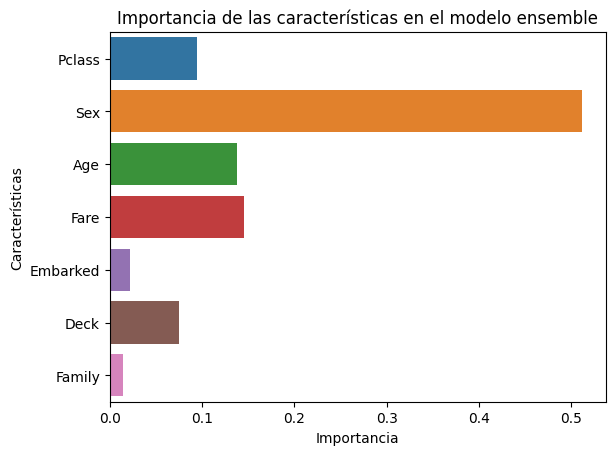

In [274]:
# Obtener la importancia de las características en el modelo ensemble
ensemble_feature_importance = np.mean([model[1].feature_importances_ for model in models], axis=0)

# Crear un gráfico de barras de la importancia de las características en el modelo ensemble
sns.barplot(x=ensemble_feature_importance, y=X_train.columns)
plt.title('Importancia de las características en el modelo ensemble')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [275]:
from sklearn import metrics

c:\Users\cj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 600x600 with 0 Axes>

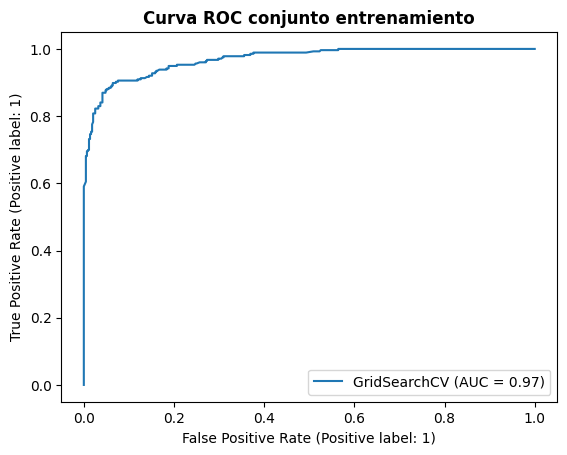

c:\Users\cj_li\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


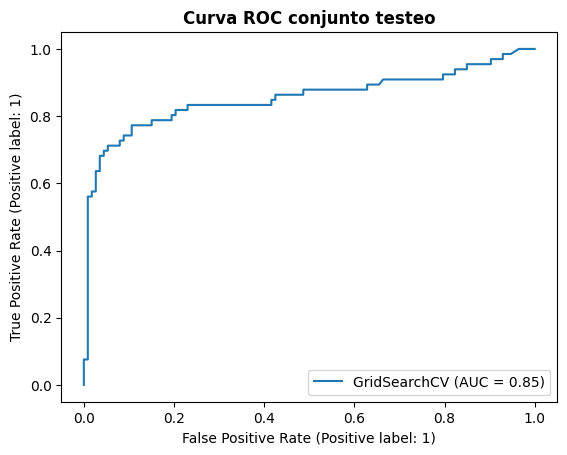

In [277]:
# Se visualiza la curva ROC y el AUC para el conjunto de entrenamiento
plt.figure(figsize=(6,6))
metrics.plot_roc_curve(opt_rf_model, X_train, y_train)
plt.title('Curva ROC conjunto entrenamiento', weight='bold')
plt.show()

# Se visualiza la curva ROC y el AUC para el conjunto de testeo
metrics.plot_roc_curve(opt_rf_model, X_test, y_test)
plt.title('Curva ROC conjunto testeo', weight='bold')
plt.show()

In [278]:
probabs = pd.DataFrame(opt_rf_model.predict_proba(X_test)[:,1], columns=["$P$ Clase 1"]) #Probabilidades para ver el punto de corte del modelo XGBoost con búsqueda exhaustiva
probabs['Survived'] = np.array(y_test)

In [279]:
probabs.describe()

,$P$ Clase 1,Survived
count,179.000000,179.000000
mean,0.378622,0.368715
std,0.342180,0.483810
min,0.015009,0.000000
25%,0.098683,0.000000
50%,0.216182,0.000000
75%,0.687338,1.000000
max,1.000000,1.000000


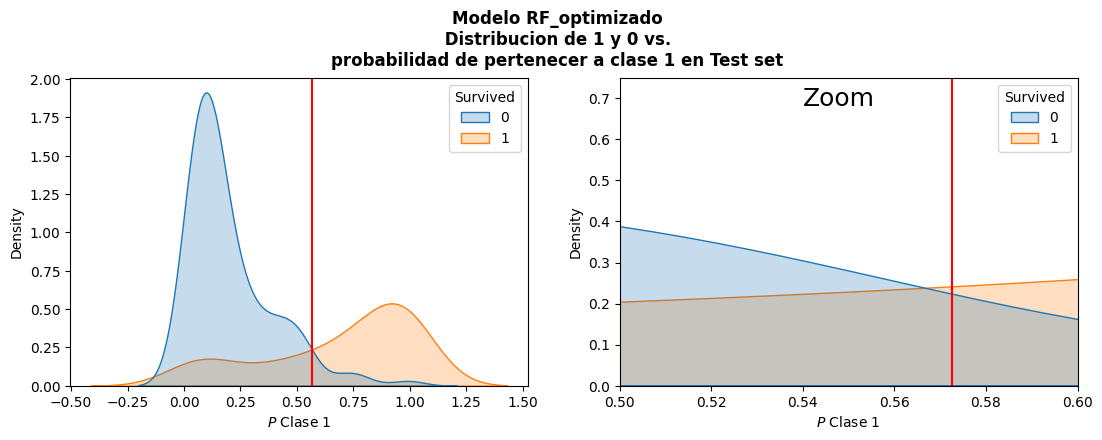

In [280]:
plt.figure(figsize=(13,4))

#plot 1:
plt.subplot(1, 2, 1)
sns.kdeplot(data = probabs, x="$P$ Clase 1", hue='Survived', fill=True)
plt.axvline(0.565, color='red')

#plot 2:
plt.subplot(1, 2, 2)
sns.kdeplot(data = probabs, x="$P$ Clase 1", hue= 'Survived', fill=True)
plt.text(0.54, 0.7, f'Zoom', fontsize = 18, ha="left", va="center")
plt.xlim(0.50, 0.60)
plt.ylim(0.00, 0.75) # (left, right)
plt.axvline(0.5725, color='red')

plt.suptitle("Modelo RF_optimizado\n Distribucion de 1 y 0 vs. \nprobabilidad de pertenecer a clase 1 en Test set", y = 1.05, fontsize = 12, fontweight="bold")

plt.show()

## Hacer las predicciones finales

In [281]:
# Hacer predicciones en el conjunto de prueba con el modelo ensamblado 1
y_pred = ensemble_1.predict(test_im)

In [296]:
# Hacer predicciones en el conjunto de prueba con el modelo RF con la búsqueda aleatoria de parámetros
y_pred = random_rf_model.predict(test_im)

In [297]:
y_pred = pd.DataFrame(y_pred)
columnas = ['Survived']
y_pred.columns = columnas

In [298]:
y_pred.head(10)

,Survived
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,1
9,0


In [299]:
y_pred.value_counts()

Survived
0           281
1           137
dtype: int64

In [300]:
test_data = pd.read_csv(('./test.csv'))
id =test_data['PassengerId']

In [301]:
id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: PassengerId
Non-Null Count  Dtype
--------------  -----
418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [302]:
y_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [303]:
predic = pd.concat([id, y_pred], axis=1)

In [304]:
predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [197]:
predic['Survived'] = predic['Survived'].astype(int)

In [305]:
predic.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [306]:
predic.to_csv('submission_CL_12.csv', index=False)

Probar:  
Eliminar Deck, luego aplicar KNN  
Regresión Logística  
Considerar solo variables categóricas  

12.06.2023 El ensamblado_1 obtuvo una puntuación dfe 0.7775 en Kaggle, mejor hasta el momento

19-06-2023  
Tengo la impresión de que los modelos están sobreajustados por la pasada de características del data set de prueba.  
Próximo paso trabajar las muestras 100% por separado